In [ ]:
install.packages("HMM")
install.packages("entropy")

library(HMM)
library(entropy)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



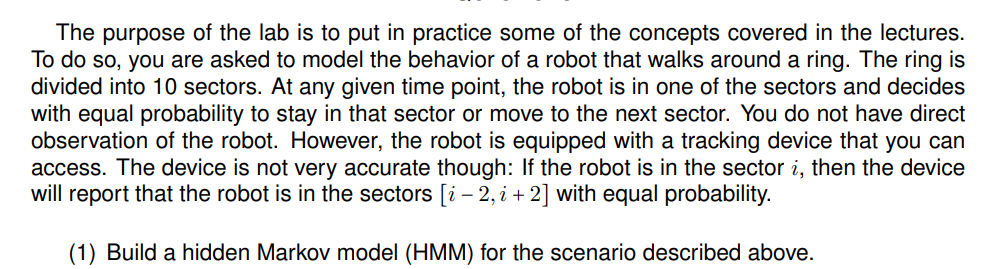

In [ ]:
# Problem definition

sectors = 10
trans_prob = 0.5 # Prob of going forwards or backwards
em_prob = 0.2  # [-2,-1, current_poss, 1, 2] 5 possible sectors with equal probability
startProbs = rep(1/sectors, sectors)
states = 1:sectors
symbols = 1:sectors

# Building transmission matrix

transition = diag(trans_prob, sectors, sectors) # Prob of staying in place
transition = transition + apply(transition, 1, function(x) c(x[2:sectors],x[1])) # Prob of moving

# Building emission matrix

emission = diag(1, sectors, sectors) # pos
emission = (
  emission 
  + apply(emission, 1, function(x) c(x[2:sectors],x[1])) # pos + 1
  + apply(emission, 1, function(x) c(x[3:sectors],x[1:2]))) # pos + 2
emission = emission + t(emission) # Symmetry
emission[emission > 0] = 0.2 # Set probabilities

In [ ]:
robot_HMM = initHMM(States = states, Symbols = symbols, startProbs = startProbs, transProbs = transition, emissionProbs = emission)
robot_HMM

,1,2,3,4,5,6,7,8,9,10
1,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5
10,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


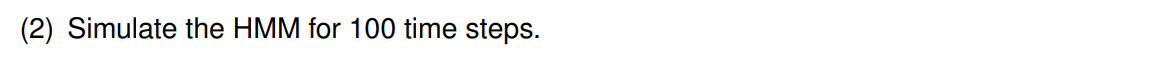

In [ ]:
robot_HMM_sim = simHMM(robot_HMM, 100)
robot_HMM_sim

$states
  [1] 10 10  1  2  2  3  4  4  4  5  6  6  7  7  7  8  9  9  9  9  9 10 10  1  2
 [26]  2  3  3  4  4  4  5  6  6  6  6  6  6  6  7  8  9  9 10 10 10 10  1  1  2
 [51]  2  3  4  4  5  5  6  7  7  8  8  9  9  9 10 10 10 10 10  1  1  2  2  2  2
 [76]  3  3  3  4  4  4  4  4  4  4  5  5  5  5  5  6  7  8  8  9 10  1  1  2  2

$observation
  [1]  9  9  9  1  3  2  5  4  4  3  6  4  5  7  9  6 10  9 10  9  9  8  9 10  3
 [26]  1  5  1  6  2  2  6  8  4  6  8  4  8  8  7  7  1 10  2  2 10  2  2  9 10
 [51] 10  2  3  5  5  5  4  6  6  9  8 10  8  7 10  8  8  8  2  2  1  1  1  2  3
 [76]  5  2  5  4  6  4  5  4  4  6  6  5  4  4  4  8  9  6 10 10  8  9  9  3  3

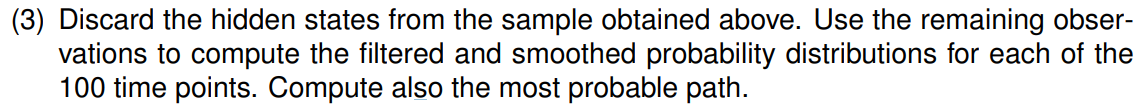

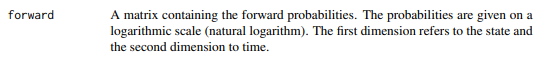



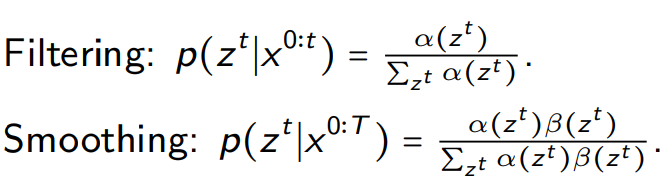

In [ ]:
alpha = exp(forward(robot_HMM, robot_HMM_sim$observation)) # Must exp to get actual probabilities

# Not sure why row sums gave wrong results, so I made my own that also divides
filtering = apply(alpha, 2 , function(x){sapply(x, function(y) y/sum(x))}) 


In [ ]:
# Could probably reuse alpha from previous step but numbers are big/small so it's better to keep them logged as long as possible 
alpha_beta = exp( forward(robot_HMM, robot_HMM_sim$observation) + backward(robot_HMM, robot_HMM_sim$observation))

smoothing = apply(alpha_beta, 2 , function(x){sapply(x, function(y) y/sum(x))}) 

In [ ]:
a = forward(robot_HMM, robot_HMM_sim$observation)
b = backward(robot_HMM, robot_HMM_sim$observation)

first_elem_div = exp(a+b)[1,1] / ( exp(a)*exp(b))[1,1]
first_elem_div

[1] 1

In [ ]:
(1-first_elem_div) < .Machine$double.eps

[1] FALSE

In [ ]:
smoothing_path = as.vector(apply(smoothing, 2, which.max))

In [ ]:
filtering_path = as.vector(apply(filtering, 2, which.max))

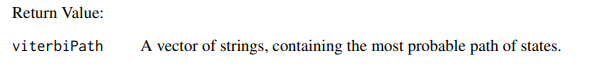

In [ ]:
viterbi_path = viterbi(robot_HMM,robot_HMM_sim$observation)

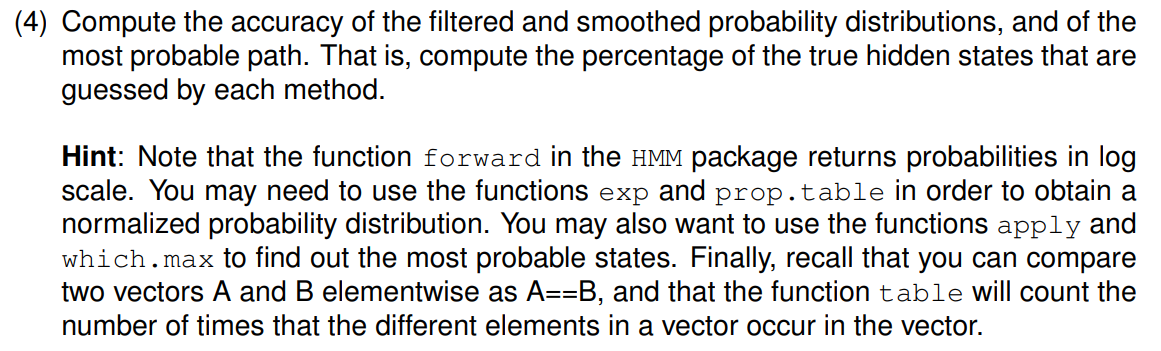

In [ ]:
accuracy=function(ground, preds){
  acc_table = table(ground, preds)
  return(sum(diag(acc_table))/sum(acc_table))
}

In [ ]:
accuracy(robot_HMM_sim$states,smoothing_path)

[1] 0.7

In [ ]:
accuracy(robot_HMM_sim$states,filtering_path)

[1] 0.51

In [ ]:
accuracy(robot_HMM_sim$states,viterbi_path)

[1] 0.48

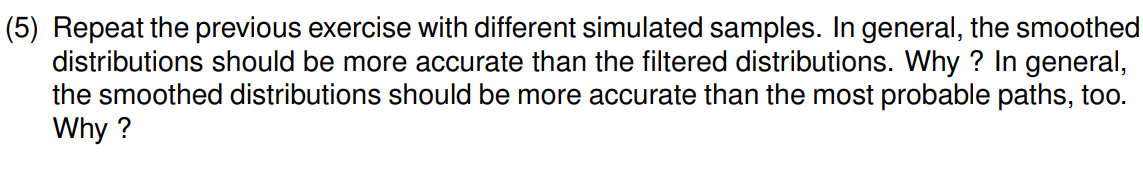

In [ ]:
compare_methods = function(samples, steps){
  filtering_accs = rep(0,samples)
  smoothing_accs = rep(0,samples)
  viterbi_accs = rep(0,samples)

  for(i in 1:samples){
    sim = simHMM(robot_HMM, steps)

    #Filtering
    alpha = forward(robot_HMM, sim$observation)
    filtering = apply(exp(alpha), 2 , function(x){sapply(x, function(y) y/sum(x))}) 
    filtering_path = as.vector(apply(filtering, 2, which.max))

    #Smoothing
    beta = backward(robot_HMM, sim$observation)
    smoothing = apply(exp(alpha+beta), 2 , function(x){sapply(x, function(y) y/sum(x))}) 
    smoothing_path = as.vector(apply(smoothing, 2, which.max))

    #Viterbi
    viterbi_path = viterbi(robot_HMM,sim$observation)

  	#Benchmarking
    filtering_accs[i] = accuracy(sim$states,filtering_path)
    smoothing_accs[i] = accuracy(sim$states,smoothing_path)
    viterbi_accs[i] = accuracy(sim$states,viterbi_path)
  }
  return(data.frame(
    filtering_acc=filtering_accs,
    smoothing_acc=smoothing_accs,
    viterbi_acc=viterbi_accs))
}

results = compare_methods(100,100)

print("Filtering accuracies summary")
print(summary(results$filtering_acc))
#plot(density(filtering_accs), main = "Filtering")

print("Smoothing accuracies summary")
print(summary(results$smoothing_acc))

print("Viterbi accuracies summary")
print(summary(results$viterbi_acc))

#plot(density(smoothing_accs),main = "Smoothing")



[1] "Filtering accuracies summary"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3800  0.4975  0.5400  0.5379  0.5800  0.6600 
[1] "Smoothing accuracies summary"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5800  0.6575  0.6900  0.6846  0.7100  0.8100 
[1] "Viterbi accuracies summary"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3100  0.4200  0.5000  0.4881  0.5400  0.7800 


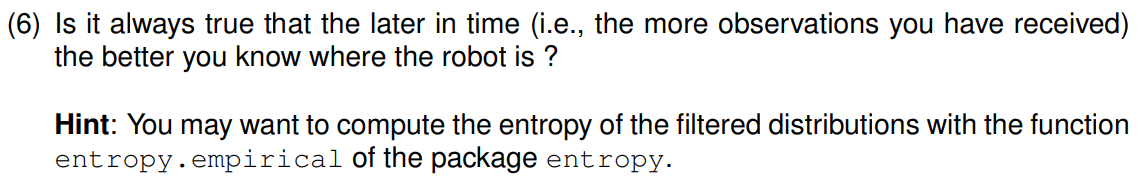

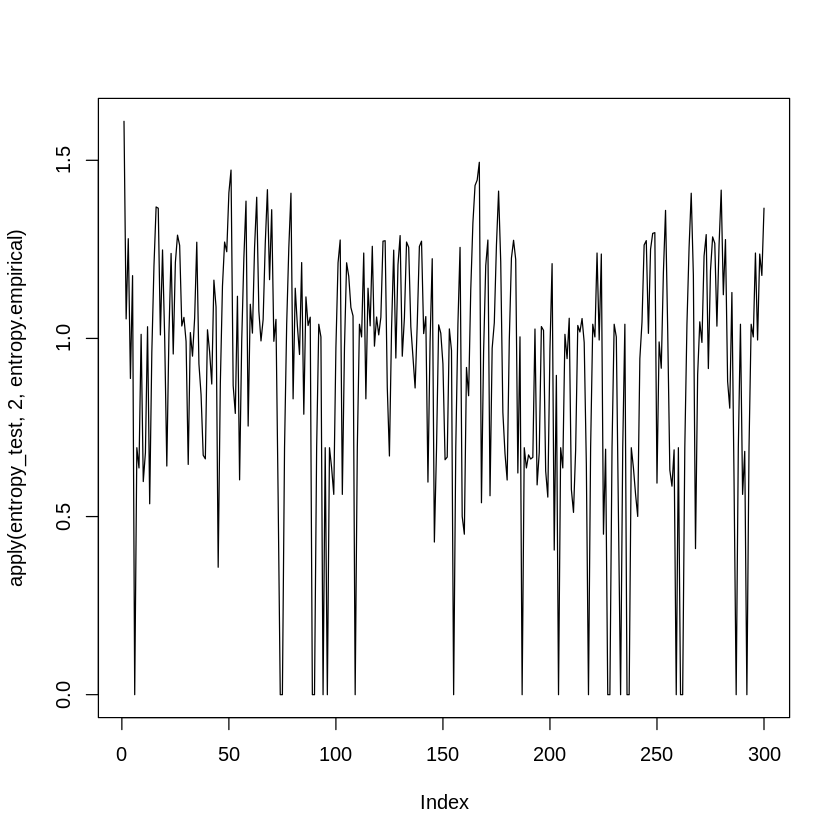

In [ ]:
filtering_calc = function(steps){
  sim = simHMM(robot_HMM, steps)

  #Smoothing
  alpha = forward(robot_HMM, sim$observation)
  filtering = apply(exp(alpha), 2 , function(x){sapply(x, function(y) y/sum(x))}) 

  return(filtering)
}

entropy_test = filtering_calc(300)
plot(apply(entropy_test,2,entropy.empirical),type = 'l')


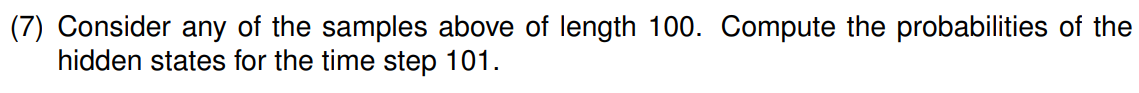

In [ ]:
step_100 = filtering_calc(100)[,100]
step_101 = step_100 %*% transition

In [ ]:
step_101

0,0,0.125,0.375,0.375,0.125,0,0,0,0
